## data set: this is a data that contains the details of employees from andorganisation which can be analised to take better decisuions by hr. 

## in this notebook: here we will try to see how correlation works in data set we will try to see various correlation here for understanding

#spearmen correlation:

#pearsons correlation :

#kendalls rank correlation :

#spearmens rank correlation 



In [73]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [74]:
df  = pd.read_csv('Employee_Churn.csv')
df.head(5)

,EmployeeAge,Is_Attrite,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [75]:
df.shape

(1470, 35)

In [76]:
# column names are
df.columns

Index(['EmployeeAge', 'Is_Attrite', 'Travel', 'Rate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [77]:
df= df.rename(columns={'Is_Attrite':'target'})

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
EmployeeAge                 1470 non-null int64
target                      1470 non-null object
Travel                      1470 non-null object
Rate                        1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

## here we see that there are no null values and 26 columns are integer type and 9 are categorical type 

In [79]:
df.describe()

,EmployeeAge,Rate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


## here we can see number of factors that can be possible reasones for the employees to leave the organisation
 # distance from home 
 # stock optiion level were less 
 # years at a company : sugest that people leave the org in the very soon aprox 2-3 years  

In [80]:
# building dummies 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
EmployeeAge                 1470 non-null int64
target                      1470 non-null object
Travel                      1470 non-null object
Rate                        1470 non-null int64
Department                  1470 non-null object
DistanceFromHome            1470 non-null int64
Education                   1470 non-null int64
EducationField              1470 non-null object
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null int64
Gender                      1470 non-null object
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null int64
JobLevel                    1470 non-null int64
JobRole                     1470 non-null object
JobSatisfaction             1470 non-null int64
MaritalStatus               1470 non-null object
MonthlyIncome         

In [81]:
df.columns

Index(['EmployeeAge', 'target', 'Travel', 'Rate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EmployeeNumber', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate',
       'JobInvolvement', 'JobLevel', 'JobRole', 'JobSatisfaction',
       'MaritalStatus', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'Over18', 'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [82]:
df.head()

,EmployeeAge,target,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2


In [83]:

df['target']=pd.get_dummies(df['target'],drop_first=True)

df['Travel']=pd.get_dummies(df['Travel'],drop_first=True)

df['Department']=pd.get_dummies(df['Department'],drop_first=True)

df['EducationField']=pd.get_dummies(df['EducationField'],drop_first=True)

df['Education']=pd.get_dummies(df['Education'],drop_first=True)

df['EnvironmentSatisfaction']=pd.get_dummies(df['EnvironmentSatisfaction'],drop_first=True)

df['Gender']=pd.get_dummies(df['Gender'],drop_first=True)

df['JobInvolvement']=pd.get_dummies(df['JobInvolvement'],drop_first=True)

df['JobLevel']=pd.get_dummies(df['JobLevel'],drop_first=True)

df['JobRole']=pd.get_dummies(df['JobRole'],drop_first=True)

df['JobSatisfaction']=pd.get_dummies(df['JobSatisfaction'],drop_first=True)

df['MaritalStatus']=pd.get_dummies(df['MaritalStatus'],drop_first=True)

df['NumCompaniesWorked']=pd.get_dummies(df['NumCompaniesWorked'],drop_first=True)

df['OverTime']=pd.get_dummies(df['OverTime'],drop_first=True)

df['PercentSalaryHike']=pd.get_dummies(df['PercentSalaryHike'],drop_first=True)

df['PerformanceRating']=pd.get_dummies(df['PerformanceRating'],drop_first=True)

df['RelationshipSatisfaction']=pd.get_dummies(df['RelationshipSatisfaction'],drop_first=True)

df['StockOptionLevel']=pd.get_dummies(df['StockOptionLevel'],drop_first=True)

df['TrainingTimesLastYear']=pd.get_dummies(df['TrainingTimesLastYear'],drop_first=True)

df['WorkLifeBalance']=pd.get_dummies(df['WorkLifeBalance'],drop_first=True)






####


In [84]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
EmployeeAge                 1470 non-null int64
target                      1470 non-null uint8
Travel                      1470 non-null uint8
Rate                        1470 non-null int64
Department                  1470 non-null uint8
DistanceFromHome            1470 non-null int64
Education                   1470 non-null uint8
EducationField              1470 non-null uint8
EmployeeCount               1470 non-null int64
EmployeeNumber              1470 non-null int64
EnvironmentSatisfaction     1470 non-null uint8
Gender                      1470 non-null uint8
HourlyRate                  1470 non-null int64
JobInvolvement              1470 non-null uint8
JobLevel                    1470 non-null uint8
JobRole                     1470 non-null uint8
JobSatisfaction             1470 non-null uint8
MaritalStatus               1470 non-null uint8
MonthlyIncome               1

In [85]:
df = df.drop(['Over18','EmployeeNumber','EmployeeCount','StandardHours'],axis=1)
df.head()


,EmployeeAge,target,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1,0,1102,0,1,1,1,1,0,...,0,0,0,8,0,0,6,4,0,5
1,49,0,1,279,1,8,0,1,0,1,...,1,0,1,10,0,0,10,7,1,7
2,37,1,0,1373,1,2,1,0,0,1,...,0,1,0,7,0,0,0,0,0,0
3,33,0,1,1392,1,3,0,1,0,0,...,0,0,0,8,0,0,8,7,3,0
4,27,0,0,591,1,2,0,0,0,1,...,0,0,1,6,0,0,2,2,2,2


# Calculating correlations now. 

#

### calculating pearsons corr


In [86]:
pearsoncorr = df.corr(method='pearson')
pearsoncorr

,EmployeeAge,target,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeAge,1.000000,-0.159205,-0.024743,0.010661,0.017883,-0.001686,-0.003313,0.016824,-0.022388,-0.036311,...,0.001904,-0.012322,0.107176,0.680381,0.023421,0.016048,0.311309,0.212901,0.216513,0.202089
target,-0.159205,1.000000,0.115143,-0.056652,-0.085293,0.077924,-0.006884,-0.032703,-0.015267,0.029453,...,0.002889,-0.017611,-0.151049,-0.171063,-0.021113,0.011093,-0.134392,-0.160545,-0.033019,-0.156199
Travel,-0.024743,0.115143,1.000000,-0.011776,0.003340,0.005081,-0.031539,0.031128,-0.013521,-0.022015,...,0.016463,-0.034815,0.005997,-0.012177,-0.003074,0.004841,0.012991,0.001680,0.023216,0.012628
Rate,0.010661,-0.056652,-0.011776,1.000000,0.014871,-0.004985,0.023686,0.004028,-0.013251,-0.011716,...,0.000473,0.012848,0.021147,0.014515,0.021400,0.034220,-0.034055,0.009932,-0.033229,-0.026363
Department,0.017883,-0.085293,0.003340,0.014871,1.000000,-0.008117,-0.008552,0.127321,-0.038322,0.015760,...,0.032720,0.049189,0.009814,0.011087,-0.002772,0.034153,-0.032181,-0.028151,-0.021497,-0.014963
DistanceFromHome,-0.001686,0.077924,0.005081,-0.004985,-0.008117,1.000000,0.000791,-0.024499,0.024723,-0.001851,...,0.027110,0.037490,-0.022694,0.004628,0.006786,0.009075,0.009508,0.018845,0.010029,0.014406
Education,-0.003313,-0.006884,-0.031539,0.023686,-0.008552,0.000791,1.000000,-0.000888,0.021544,-0.014812,...,0.022248,-0.051792,0.055124,-0.035505,0.019176,-0.004047,-0.031398,-0.042287,-0.028933,-0.017303
EducationField,0.016824,-0.032703,0.031128,0.004028,0.127321,-0.024499,-0.000888,1.000000,-0.022015,0.006770,...,0.010853,0.007140,0.020554,-0.003630,0.043385,-0.012444,-0.002019,0.018343,-0.002480,0.003636
EnvironmentSatisfaction,-0.022388,-0.015267,-0.013521,-0.013251,-0.038322,0.024723,0.021544,-0.022015,1.000000,0.009809,...,-0.010105,0.016304,0.009221,-0.026310,-0.006899,0.043933,-0.001217,0.013838,0.018707,0.008498
Gender,-0.036311,0.029453,-0.022015,-0.011716,0.015760,-0.001851,-0.014812,0.006770,0.009809,1.000000,...,-0.013859,0.017850,-0.007353,-0.046881,0.015544,0.005248,-0.029747,-0.041483,-0.026985,-0.030599


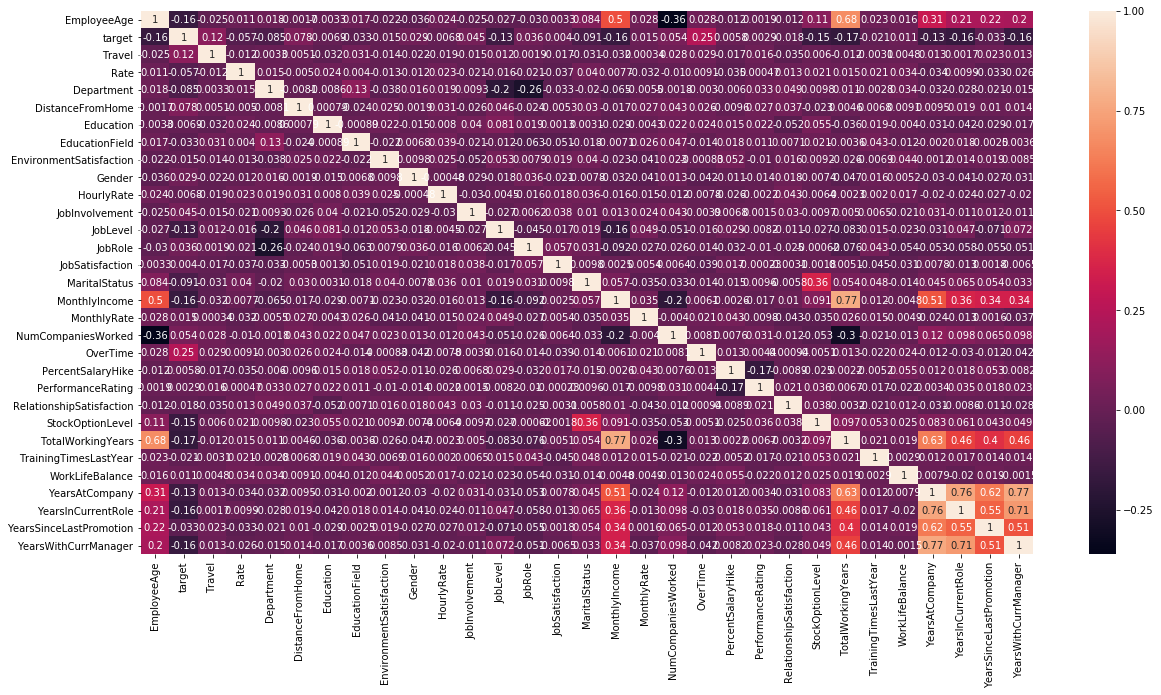

In [87]:

# heat map method 1:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method='pearson'),annot = True)


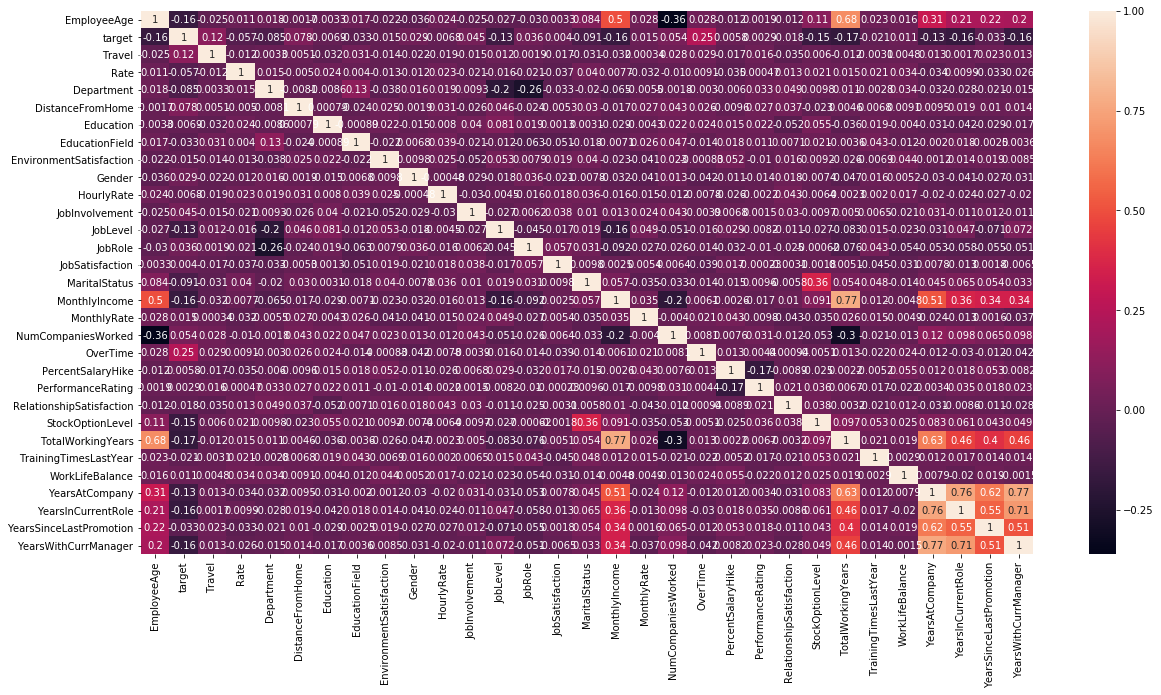

In [88]:
#* this is suggested in case of continuous data only 
# if one or both the variables are categorical then we should look at the spearman correlation cofficient 
# however we will still perform this just for study and fun

plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method='pearson'),annot = True)

In [89]:
spearmancorr= df.corr(method='spearman')
spearmancorr

,EmployeeAge,target,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeAge,1.000000,-0.171214,-0.021040,0.007290,0.018278,-0.019291,0.005887,0.023308,-0.010578,-0.036088,...,0.000093,-0.010423,0.106657,0.656896,0.020840,0.000064,0.251686,0.197978,0.173647,0.194818
target,-0.171214,1.000000,0.115143,-0.056970,-0.085293,0.079248,-0.006884,-0.032703,-0.015267,0.029453,...,0.002889,-0.017611,-0.151049,-0.199002,-0.021113,0.011093,-0.190419,-0.180623,-0.053273,-0.175355
Travel,-0.021040,0.115143,1.000000,-0.012103,0.003340,-0.008361,-0.031539,0.031128,-0.013521,-0.022015,...,0.016463,-0.034815,0.005997,-0.011069,-0.003074,0.004841,0.016883,0.016177,0.034986,0.012914
Rate,0.007290,-0.056970,-0.012103,1.000000,0.014350,-0.002754,0.023068,0.004007,-0.013008,-0.011415,...,0.000624,0.011831,0.021187,0.020951,0.020925,0.034229,-0.009778,0.007208,-0.037631,-0.004717
Department,0.018278,-0.085293,0.003340,0.014350,1.000000,-0.019487,-0.008552,0.127321,-0.038322,0.015760,...,0.032720,0.049189,0.009814,0.009070,-0.002772,0.034153,-0.035586,-0.037366,-0.015596,-0.014676
DistanceFromHome,-0.019291,0.079248,-0.008361,-0.002754,-0.019487,1.000000,0.003363,-0.040147,0.022247,0.004387,...,0.011320,0.029915,-0.026077,-0.002912,0.003200,0.000306,0.010513,0.013708,-0.004685,0.004448
Education,0.005887,-0.006884,-0.031539,0.023068,-0.008552,0.003363,1.000000,-0.000888,0.021544,-0.014812,...,0.022248,-0.051792,0.055124,-0.018717,0.019176,-0.004047,-0.013856,-0.034591,-0.020096,-0.005472
EducationField,0.023308,-0.032703,0.031128,0.004007,0.127321,-0.040147,-0.000888,1.000000,-0.022015,0.006770,...,0.010853,0.007140,0.020554,0.001198,0.043385,-0.012444,-0.007832,0.006502,-0.021450,-0.005507
EnvironmentSatisfaction,-0.010578,-0.015267,-0.013521,-0.013008,-0.038322,0.022247,0.021544,-0.022015,1.000000,0.009809,...,-0.010105,0.016304,0.009221,0.002941,-0.006899,0.043933,0.017658,0.012597,0.017493,0.008347
Gender,-0.036088,0.029453,-0.022015,-0.011415,0.015760,0.004387,-0.014812,0.006770,0.009809,1.000000,...,-0.013859,0.017850,-0.007353,-0.049343,0.015544,0.005248,-0.042176,-0.030361,-0.025048,-0.026663


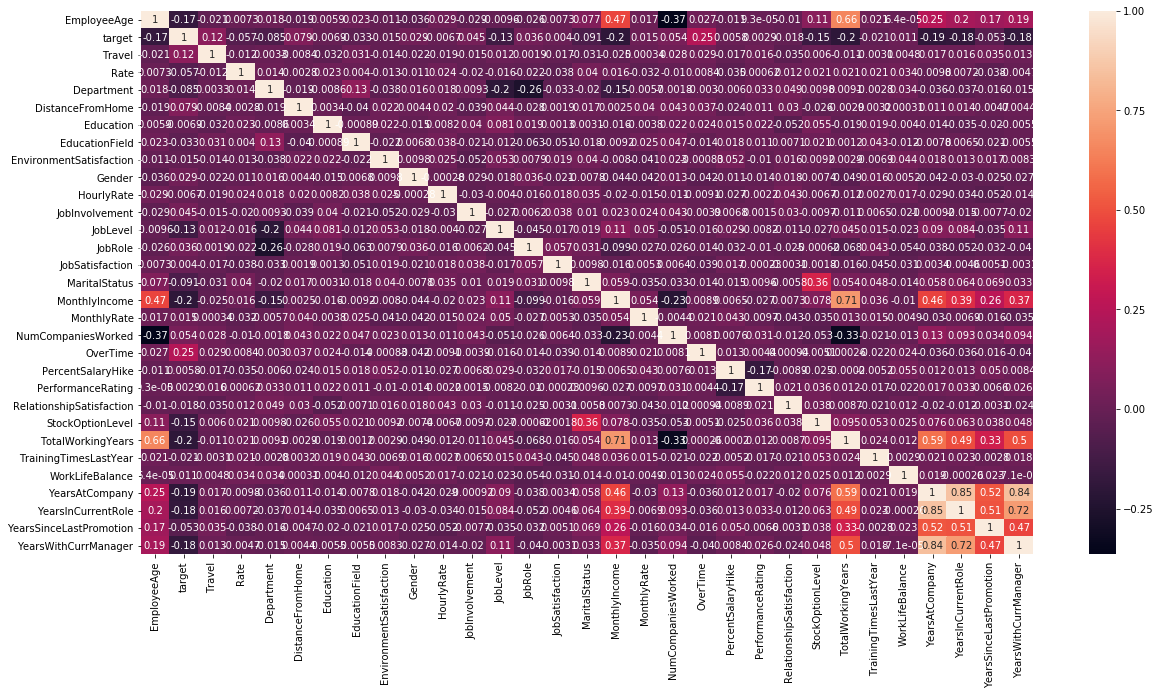

In [90]:
plt.figure(figsize = (20,10))
sns.heatmap(df.corr(method='spearman'),annot = True)

In [91]:
kendallcorr= df.corr(method='kendall')
kendallcorr

,EmployeeAge,target,Travel,Rate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
EmployeeAge,1.000000,-0.142012,-0.017452,0.005433,0.015161,-0.013578,0.004883,0.019333,-0.008774,-0.029932,...,0.000077,-0.008645,0.088466,0.502030,0.017286,0.000053,0.186919,0.145581,0.129532,0.143702
target,-0.142012,1.000000,0.115143,-0.046549,-0.085293,0.066765,-0.006884,-0.032703,-0.015267,0.029453,...,0.002889,-0.017611,-0.151049,-0.166781,-0.021113,0.011093,-0.161006,-0.156711,-0.047753,-0.152006
Travel,-0.017452,0.115143,1.000000,-0.009889,0.003340,-0.007044,-0.031539,0.031128,-0.013521,-0.022015,...,0.016463,-0.034815,0.005997,-0.009277,-0.003074,0.004841,0.014275,0.014035,0.031361,0.011195
Rate,0.005433,-0.046549,-0.009889,1.000000,0.011725,-0.002029,0.018849,0.003274,-0.010629,-0.009327,...,0.000510,0.009667,0.017312,0.014613,0.017097,0.027968,-0.007025,0.004900,-0.027504,-0.003418
Department,0.015161,-0.085293,0.003340,0.011725,1.000000,-0.016417,-0.008552,0.127321,-0.038322,0.015760,...,0.032720,0.049189,0.009814,0.007601,-0.002772,0.034153,-0.030089,-0.032419,-0.013980,-0.012722
DistanceFromHome,-0.013578,0.066765,-0.007044,-0.002029,-0.016417,1.000000,0.002833,-0.033823,0.018743,0.003696,...,0.009537,0.025202,-0.021969,-0.001818,0.002696,0.000258,0.007533,0.009985,-0.003318,0.003116
Education,0.004883,-0.006884,-0.031539,0.018849,-0.008552,0.002833,1.000000,-0.000888,0.021544,-0.014812,...,0.022248,-0.051792,0.055124,-0.015686,0.019176,-0.004047,-0.011716,-0.030012,-0.018014,-0.004743
EducationField,0.019333,-0.032703,0.031128,0.003274,0.127321,-0.033823,-0.000888,1.000000,-0.022015,0.006770,...,0.010853,0.007140,0.020554,0.001004,0.043385,-0.012444,-0.006622,0.005641,-0.019227,-0.004774
EnvironmentSatisfaction,-0.008774,-0.015267,-0.013521,-0.010629,-0.038322,0.018743,0.021544,-0.022015,1.000000,0.009809,...,-0.010105,0.016304,0.009221,0.002465,-0.006899,0.043933,0.014931,0.010930,0.015680,0.007236
Gender,-0.029932,0.029453,-0.022015,-0.009327,0.015760,0.003696,-0.014812,0.006770,0.009809,1.000000,...,-0.013859,0.017850,-0.007353,-0.041354,0.015544,0.005248,-0.035662,-0.026342,-0.022453,-0.023112


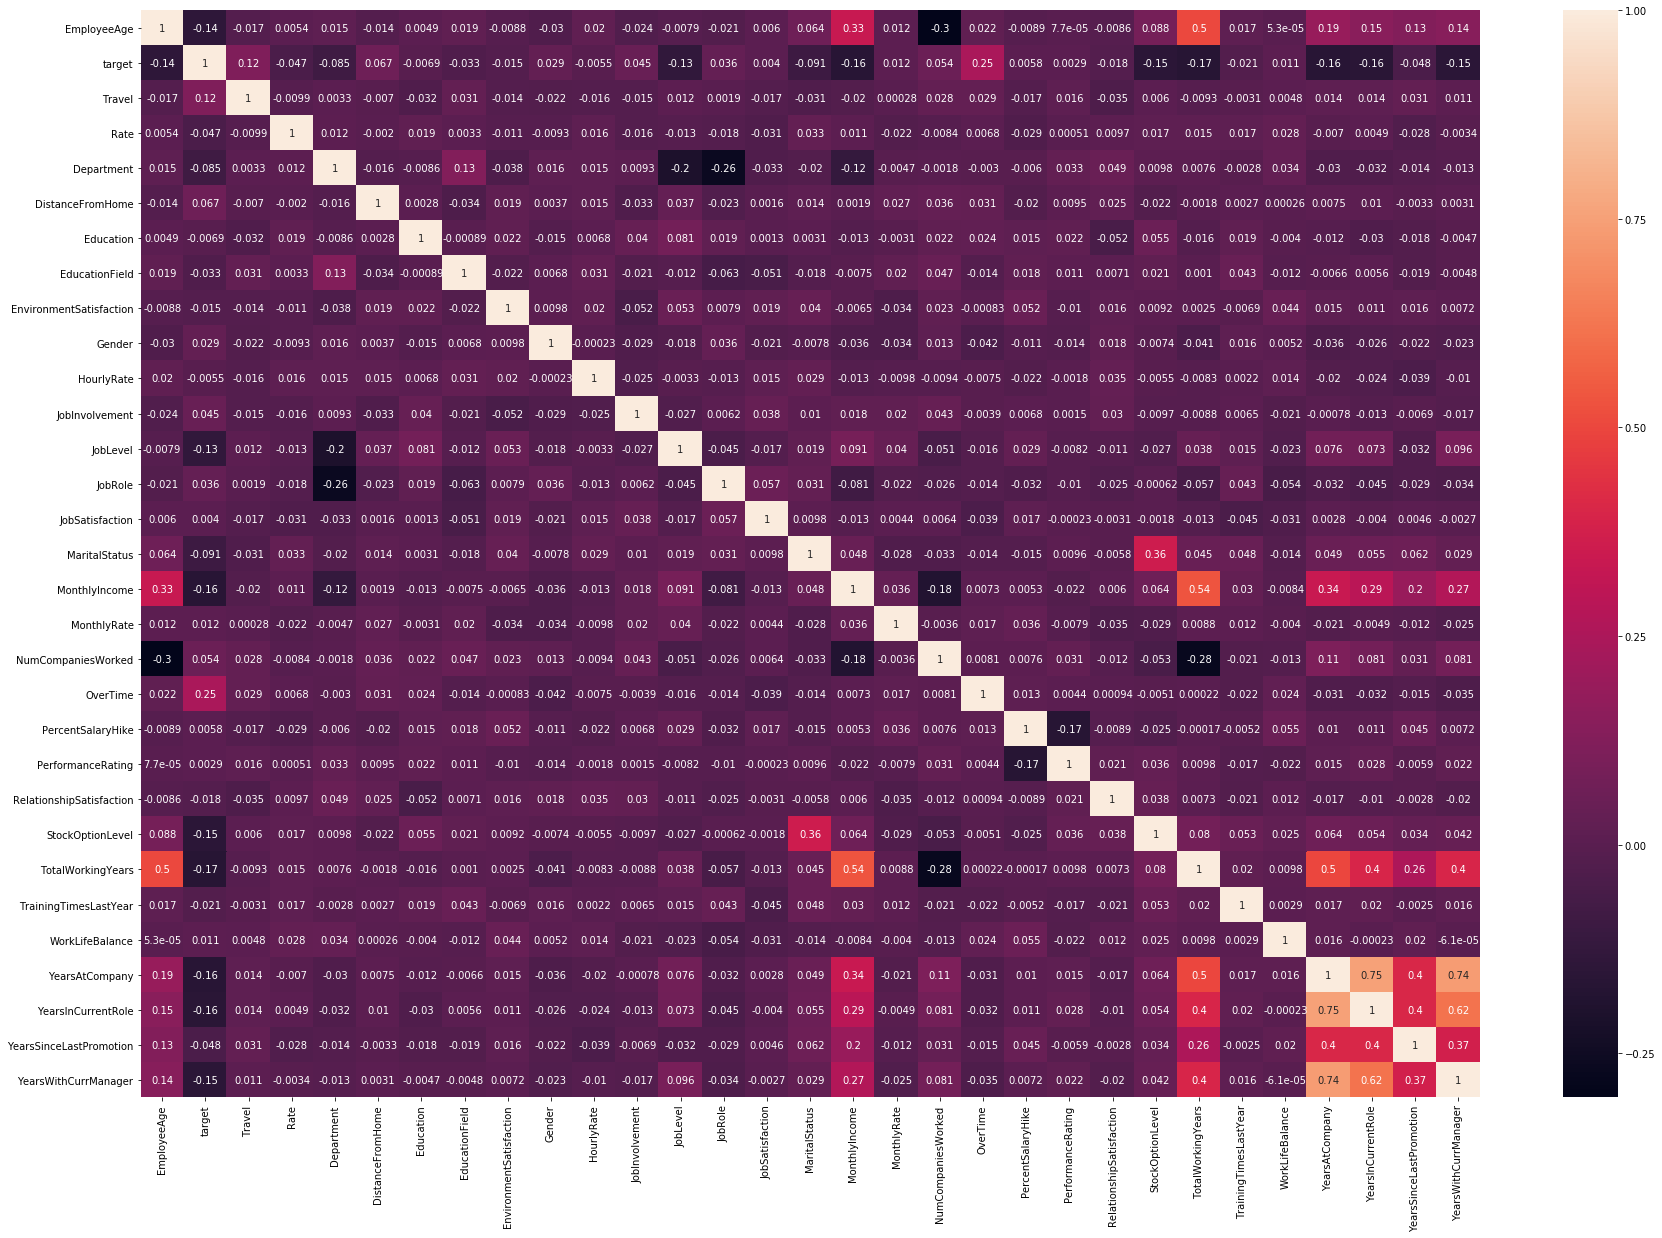

In [92]:
plt.figure(figsize = (30,20))
sns.heatmap(df.corr(method='kendall'),annot = True)

# here we see how to calculate pair wise correlation. 

# calculate Pearson's correlation


In [93]:
from scipy.stats import pearsonr

data1 = df['EmployeeAge']
data2 = df['MonthlyIncome']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.3f' % corr)

Pearsons correlation: 0.498


# calculate spearman's correlation


In [94]:
from scipy.stats import spearmanr

data1 = df['EmployeeAge']
data2 = df['MonthlyIncome']

corr, _ = spearmanr(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.472


## calculate kendalltau's correlation


In [95]:
from scipy.stats import kendalltau

data1 = df['EmployeeAge']
data2 = df['MonthlyIncome']

corr, _ = kendalltau(data1, data2)
print('Spearmans correlation: %.3f' % corr)

Spearmans correlation: 0.334
